# Importing Libraries and loading dataset from sklearn

In [ ]:
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import math

In [ ]:
dataset = datasets.load_digits()
Y=dataset.target
print(Y)
dataset.images

[0 1 2 ... 8 9 8]


array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

# Modifying the Data ( reshape, splitting Train and Test Data)

In [ ]:
#making 8x8 to 64x1 matrix for vector multiplication
X=dataset.images.reshape(len(dataset.images),-1)

In [ ]:
_#encoding (one hot encode format) into binary form of the data using loss function
from keras.utils import np_utils
print(Y.shape)
Y=np_utils.to_categorical(Y,10)
print(Y.shape)

(1797,)
(1797, 10)


In [ ]:
#Train and testing the data
from sklearn.model_selection import train_test_split
x_train,x_left,y_train,y_left = train_test_split(X,Y,test_size=0.4,random_state=35)
x_test,x_val,y_test,y_val = train_test_split(x_left,y_left,test_size=0.5,random_state=35)
x_train.shape

(1078, 64)

In [ ]:
y_train.shape

(1078, 10)

In [ ]:
x_test.shape

(359, 64)

In [ ]:
y_test.shape

(359, 10)

# Creating a Keras Neural network model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers

In [ ]:
model = Sequential()
model.add(layers.Dense(64,input_shape=(64,),activation="relu"))
model.add(layers.Dense(64,activation="gelu"))
model.add(layers.Dense(32,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))

In [ ]:
#model is being compiled using the Adam optimizer, using categorical crossentropy as the loss function and accuracy as the metric
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=20,batch_size=32,verbose=1,validation_data=(x_test,y_test))

Epoch 1/20
34/34 [==============================] - 2s 12ms/step - loss: 2.5040 - accuracy: 0.3006 - val_loss: 1.2723 - val_accuracy: 0.6017
Epoch 2/20
34/34 [==============================] - 0s 5ms/step - loss: 0.8895 - accuracy: 0.7505 - val_loss: 0.6188 - val_accuracy: 0.8301
Epoch 3/20
34/34 [==============================] - 0s 4ms/step - loss: 0.4333 - accuracy: 0.8878 - val_loss: 0.3260 - val_accuracy: 0.9109
Epoch 4/20
34/34 [==============================] - 0s 4ms/step - loss: 0.2455 - accuracy: 0.9314 - val_loss: 0.2267 - val_accuracy: 0.9415
Epoch 5/20
34/34 [==============================] - 0s 4ms/step - loss: 0.1648 - accuracy: 0.9583 - val_loss: 0.1943 - val_accuracy: 0.9415
Epoch 6/20
34/34 [==============================] - 0s 5ms/step - loss: 0.1175 - accuracy: 0.9712 - val_loss: 0.1759 - val_accuracy: 0.9415
Epoch 7/20
34/34 [==============================] - 0s 5ms/step - loss: 0.0877 - accuracy: 0.9824 - val_loss: 0.1354 - val_accuracy: 0.9666
Epoch 8/20
34/34 [=

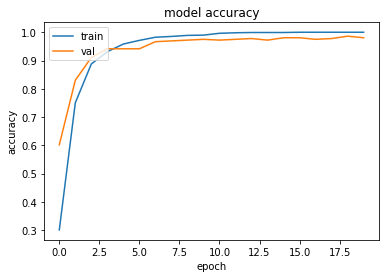

In [ ]:
#plotting the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_train,y_train)

34/34 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000


[0.005473169963806868, 1.0]

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.0752 - accuracy: 0.9805


In [ ]:
test_loss

0.0751858800649643

In [ ]:
test_acc

0.9805014133453369

# Implementing Feed forwarding using Activation functions

In [ ]:
#storing the weights with bias
W=model.get_weights()
print(W)

[array([[ 0.05757479, -0.02421552,  0.02925111, ...,  0.10084496,
         0.05279751,  0.21295314],
       [ 0.07426314, -0.15721966,  0.12245663, ...,  0.15376939,
         0.1230792 ,  0.17166902],
       [ 0.1391233 , -0.13818468,  0.0976582 , ...,  0.13025555,
        -0.04394886,  0.15381706],
       ...,
       [ 0.21093288, -0.07409799,  0.10029223, ...,  0.07593687,
         0.13221428, -0.29076684],
       [ 0.19949098,  0.0440314 , -0.18528429, ...,  0.05119657,
        -0.16240795,  0.15289266],
       [ 0.10667703, -0.1342784 , -0.19828644, ..., -0.23599559,
         0.08614717, -0.21930316]], dtype=float32), array([ 0.00181737,  0.01703721,  0.00545244, -0.01226966, -0.01278371,
        0.00801545,  0.01473952,  0.        ,  0.        ,  0.04188875,
       -0.0104332 , -0.01395205, -0.0032102 , -0.01765881,  0.00667793,
        0.00700997,  0.00656286,  0.03574514, -0.00911512, -0.00152906,
       -0.00119757,  0.00088948,  0.03128687,  0.02348202,  0.0221612 ,
        0.

In [ ]:
for weights in W:
  print(len(weights))

64
64
64
64
64
32
32
10


In [ ]:
#defining RELU function:
def relu(x):
    return np.maximum(x, 0)

In [ ]:
#defining Gelu function:
def gelu(x):
    cdf = 0.5 * (1.0 + np.tanh((np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3)))))
    return x * cdf

In [ ]:
#defining Softmax function:
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [ ]:

def feed_forward(x, weights):
    x = np.dot(x, weights[0]) + weights[1]
    x = relu(x)
    x = np.dot(x, weights[2]) + weights[3]
    x = gelu(x)
    x = np.dot(x, weights[4]) + weights[5]
    x = relu(x)
    x = np.dot(x, weights[6]) + weights[7]
    x = softmax(x)
    return x

9


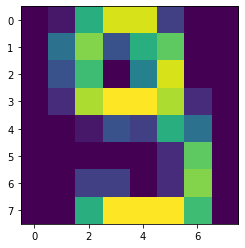

In [ ]:
plt.imshow(x_train[0].reshape(8, -1))
print(np.argmax(y_train[0]))

# Predicting final output using feed forward and Loss function

In [ ]:
def categorical_crossentropy(target, output, from_logits=False):
    if from_logits:
        output = softmax(output)
    else:
        output /= output.sum(axis=-1, keepdims=True)
    output = np.clip(output, 1e-7, 1 - 1e-7)
    return np.sum(target * -np.log(output), axis=-1, keepdims=False)

In [ ]:
y_probability = feed_forward(x_test,W)
y_probability


array([[1.15278993e-07, 6.76354421e-04, 8.83899727e-06, ...,
        3.77991352e-08, 1.69627636e-05, 5.18147769e-10],
       [3.14155427e-08, 5.20890292e-05, 9.90797111e-07, ...,
        9.99710557e-01, 6.07262964e-08, 1.42926522e-07],
       [3.11964002e-06, 3.26090167e-08, 6.61599638e-06, ...,
        4.33105145e-10, 6.16104065e-06, 7.10257130e-13],
       ...,
       [1.79982218e-10, 2.16193958e-07, 7.24405180e-04, ...,
        1.62087829e-11, 9.22187158e-05, 1.87357513e-05],
       [1.23703199e-05, 4.51750306e-08, 2.26404395e-06, ...,
        4.58124249e-09, 7.91690331e-04, 9.99040254e-01],
       [9.89400449e-05, 1.42720865e-06, 1.06409783e-06, ...,
        2.81209309e-07, 1.38606873e-02, 9.85690541e-01]])

In [ ]:
loss_function = categorical_crossentropy(y_test,y_probability)
loss_function.shape


(359,)

In [ ]:
y_test.shape

(359, 10)

# Results:
comparing accuracy and loss calculated from model and feed forward respectively

In [ ]:
#accuracy from test data
test_acc

0.9805014133453369

In [ ]:
#Loss from test data
test_loss

0.0751858800649643

In [ ]:
#Accuracy from feed forwarding
np.mean(np.argmax(y_test,axis=1)==np.argmax(y_probability,axis=1))

0.9805013927576601

In [ ]:
#Loss from feed forwarding
np.mean(loss_function)

0.07518909712234226

In [ ]:
x_test.reshape((-1,8,8)).shape

(359, 8, 8)

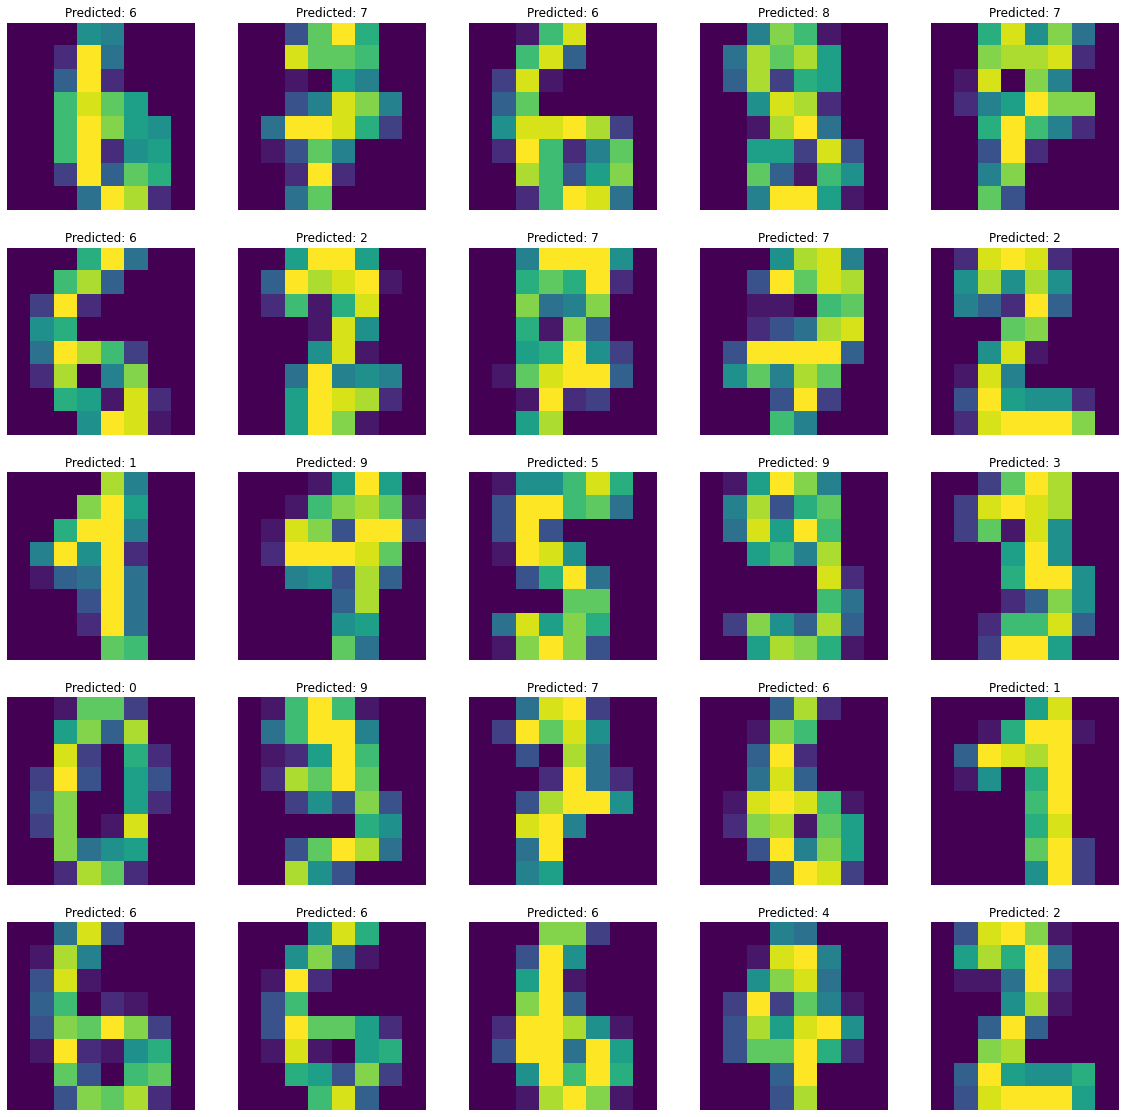

In [ ]:
plt.figure(figsize=(20,20))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i].reshape((8,8)))
    plt.title("Predicted: {}".format(np.argmax(y_probability[i])))
    plt.axis("off")


plt.show()